# The Sparks Foundation - Data Science & Business Analytics Internship

### Author- ANKIT KUMAR

### TASK 2 - Prediction using Unsupervised Machine Learning
In this task it is required to predict the optimum number of cluster for the iris data set. Iris data set consists of 3 types of flower namely "Iris-setosa", "Iris-versicolour" and "Iris-virginica".

###### Steps :

- Importing the libraries
- Reading the dataset 
- Finding the optimum number of clusters
- Applying KMeans clustering on the data
- Visualising the clusters

## Importing the libraries

In [1]:
# Importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import KMeans

import warnings as w # To ignore the warnings if any.
w.filterwarnings("ignore")

In [2]:
# Reading iris dataset 
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Reading the dataset

In [4]:
data.shape

(150, 6)

In [5]:
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
data.isna().sum() # Checking if our dataset contains any null or missing values

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
# now we will drop the label column because it is an unsupervised learning problem 
iris = pd.DataFrame(data)# Making copy of data in iris
x = iris.drop(columns= ['Species' ,'Id'] )
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Finding the optimum number of clusters

Before clustering the data using KMeans, we need to specify the number of clusters. In order to find the optimum number of clusters, there are various methods available like Silhouette Coefficient and the Elbow method. Here, the elbow method is used.

### Brief about the Elbow method

In this method, the number of clusters are varies within a certain range. For each number, within-cluster sum of square (wcss) value is calculated and stored in a list. These value are then plotted against the range of number of clusters used before. The location of bend in the 2d plot indicates the appropiate number of clusters.


In [11]:
# Calculating the within-cluster sum of square
from sklearn.cluster import KMeans
wcss = []

clusters_range = range(1,15)
for k in clusters_range:
    km = KMeans(n_clusters=k)
    km = km.fit(x)
    wcss.append(km.inertia_)

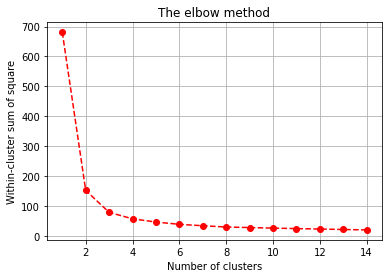

In [12]:
# Plotting the "within-cluster sum of square" against clusters range

plt.plot(clusters_range, wcss,'go--',color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of square')
plt.grid()
plt.show()


we can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (wcss) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

## Applying K means clustering on the data

In [13]:
# Applying model
km = KMeans(n_clusters =3 )
x_pred= km.fit_predict(x.iloc[:, 0:4])
x['clusters']= x_pred

# now creating a separate data frames  with clusters
x1 = x[x.clusters==0]
x2 = x[x.clusters==1]
x3 = x[x.clusters==2]

## Visualising the clusters

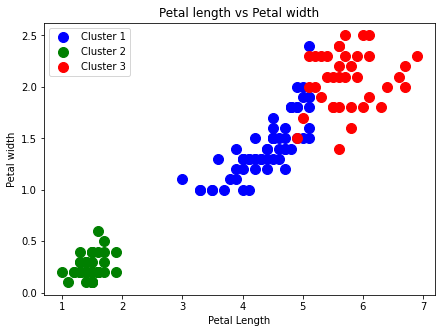

In [14]:
# Creating scatter plot Petal length vs Petal width
plt.figure(figsize=(7,5))
plt.title('Petal length vs Petal width')
plt.scatter(x1['PetalLengthCm'], x1['PetalWidthCm'], s=100,  c='blue', label='Cluster 1')
plt.scatter(x2['PetalLengthCm'], x2['PetalWidthCm'], s=100, c='green', label='Cluster 2')
plt.scatter(x3['PetalLengthCm'], x3['PetalWidthCm'], s=100, c='red', label='Cluster 3')

plt.xlabel("Petal Length",size='medium')
plt.ylabel("Petal width", size='medium')
plt.legend()
plt.show()

In [15]:
km1 = KMeans(n_clusters =3 )
y_pred= km1.fit_predict(x.iloc[:, 0:2])
x['clusters_2']= y_pred
# now creating a separate data frames  with clusters
y1 = x[x.clusters_2==0]
y2 = x[x.clusters_2==1]
y3 = x[x.clusters_2==2]


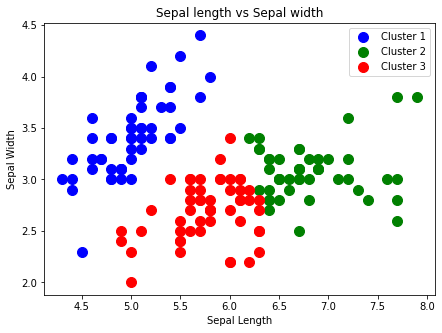

In [16]:
#Creating scatter plot Sepal length vs Sepal width
plt.figure(figsize=(7,5))
plt.title('Sepal length vs Sepal width')
plt.scatter(y1['SepalLengthCm'], y1['SepalWidthCm'], s=100, c='blue', label='Cluster 1')
plt.scatter(y2['SepalLengthCm'], y2['SepalWidthCm'], s=100, c='green', label='Cluster 2')
plt.scatter(y3['SepalLengthCm'], y3['SepalWidthCm'], s=100, c='red', label='Cluster 3')

plt.xlabel("Sepal Length", size='medium')
plt.ylabel("Sepal Width", size='medium')
plt.legend()
plt.show()

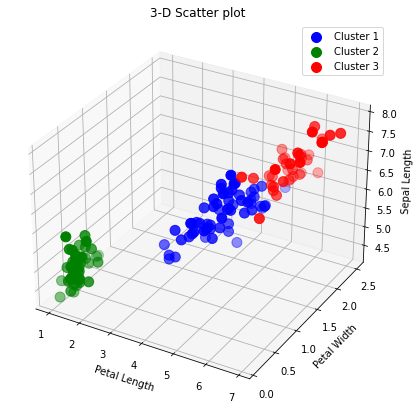

In [17]:
# Plotting 3-D projection
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (7,7))

ax = fig.add_subplot(projection='3d')
ax.scatter(x1['PetalLengthCm'], x1['PetalWidthCm'], x1['SepalLengthCm'], s=100,  c='blue', label='Cluster 1')
ax.scatter(x2['PetalLengthCm'], x2['PetalWidthCm'], x2['SepalLengthCm'], s=100, c='green', label='Cluster 2')
ax.scatter(x3['PetalLengthCm'], x3['PetalWidthCm'], x3['SepalLengthCm'], s=100, c='red', label='Cluster 3')
ax.set_xlabel('Petal Length')
ax.set_ylabel('Petal Width')
ax.set_zlabel('Sepal Length')
ax.set_title('3-D Scatter plot')

ax.legend()
plt.show()